# cnn_cifar10_gridsearch_augmentation
## Objetivo principal

El objetivo principal entrenar y optimizar una red neuronal convolucional (CNN) para la clasificación de imágenes del dataset CIFAR-10, explorando el impacto de la búsqueda de hiperparámetros y la aplicación de técnicas de data augmentation en el rendimiento del modelo.

En concreto, realiza lo siguiente:

1. Carga y preprocesamiento de datos

  * Usa CIFAR-10 (32x32x3 imágenes y 10 clases).

  * Normaliza los valores de los píxeles al rango [0,1].

  * Muestra ejemplos visuales de las imágenes con sus etiquetas.


  2. Entrenamiento de un modelo base (CNN simple)

    * Define una CNN inicial con:

      * Dos capas Conv2D (64 y 128 filtros).

      * MaxPooling2D para reducción espacial.

      * Dropout (0.5) para regularización.

      * Capa final Dense(10, softmax) para clasificación multiclase.

    * Compila el modelo con Adam y pérdida de entropía cruzada.

    * Entrena por 20 épocas con validation_split=0.1.

    * Grafica las curvas de entrenamiento (accuracy y val_accuracy).

    * Evalúa en el conjunto de prueba.


3. Optimización con Grid Search

  * Usa scikeras.wrappers.KerasClassifier + GridSearchCV de scikit-learn.

  * Define una función create_model() que construye una CNN configurable.

  * Busca los mejores hiperparámetros:

    * Función de activación: relu o sigmoid.

    * Dropout: 0.4 o 0.6.

    * Tamaño del kernel: 3 o 5.

  * Evalúa combinaciones con validación cruzada (cv=3).

  * Selecciona el mejor modelo y evalúa en el conjunto de prueba.

4. Aplicación de Data Augmentation
    * Aplica transformaciones aleatorias a las imágenes:

      * Flip horizontal, rotación aleatoria y recorte aleatorio.

    * Visualiza los resultados de estas transformaciones.

    * Entrena un nuevo modelo CNN con data augmentation incorporado.

    * Evalúa el impacto en los resultados.

5. Grid Search con Data Augmentation
  * Repite la búsqueda de hiperparámetros sobre el modelo con data augmentation (create_da_model()).

  * Vuelve a imprimir los mejores resultados y métricas.



## Objetivo subyacente
El propósito real del script es explorar cómo mejorar el rendimiento de una CNN para clasificación de imágenes combinando dos estrategias:

1. Optimización de hiperparámetros (activación, dropout, tamaño de kernel) mediante búsqueda exhaustiva con GridSearchCV.

2. Mejora de la generalización usando técnicas de data augmentation, reduciendo sobreajuste y aumentando la robustez del modelo.

En resumen, es un pipeline de experimentación en visión por computador:

> “¿Cómo afecta la búsqueda de hiperparámetros y el data augmentation al rendimiento de una CNN en CIFAR-10?”

In [ ]:
!pip install scikeras
!pip install --upgrade scikeras scikit-learn

In [2]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import datasets, layers, models

from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier


import matplotlib.pyplot as plt

In [3]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.rcParams.update({'font.size': 12})

In [4]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

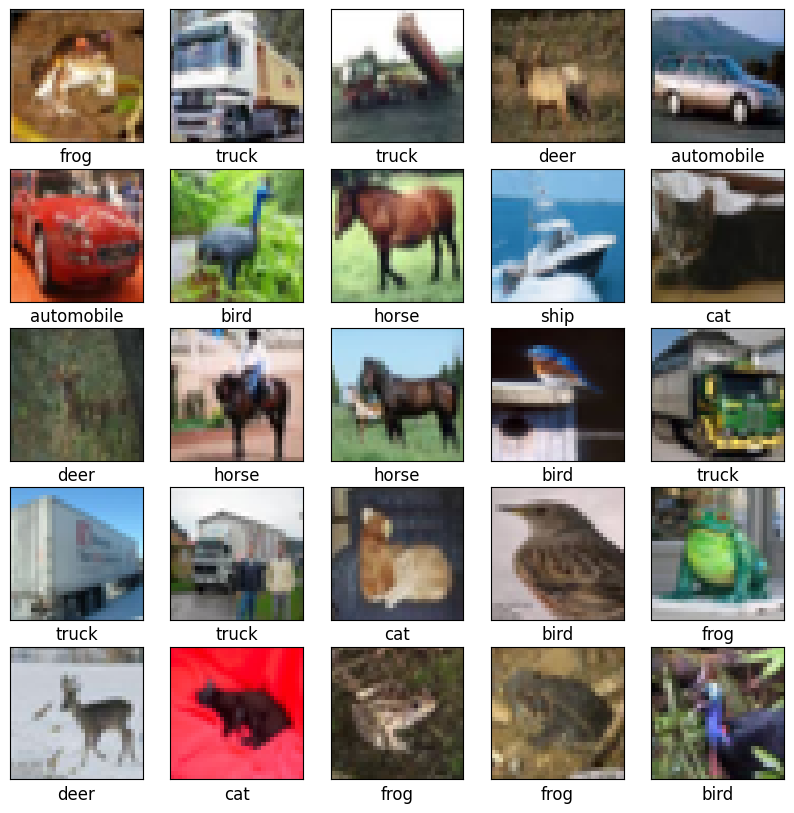

In [5]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [6]:
base_model = models.Sequential(
        [
            layers.InputLayer(input_shape=(32, 32, 3)),
            layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dropout(0.5),
            layers.Dense(10, activation="softmax"),
        ]
    )
base_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [7]:
base_history = base_model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split=0.1)

Epoch 1/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.3231 - loss: 1.8668 - val_accuracy: 0.5380 - val_loss: 1.3226
Epoch 2/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5231 - loss: 1.3531 - val_accuracy: 0.5868 - val_loss: 1.1920
Epoch 3/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5726 - loss: 1.2164 - val_accuracy: 0.6352 - val_loss: 1.0721
Epoch 4/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6047 - loss: 1.1324 - val_accuracy: 0.6502 - val_loss: 1.0190
Epoch 5/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6216 - loss: 1.0931 - val_accuracy: 0.6392 - val_loss: 1.0399
Epoch 6/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6446 - loss: 1.0331 - val_accuracy: 0.6764 - val_loss: 0.9393
Epoch 7/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6616 - loss: 0.9835 - val_accuracy: 0.6802 - val_loss: 0.9299
Epoch 8/20
352/352 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6674 - loss: 0.9605 - val_accuracy: 0

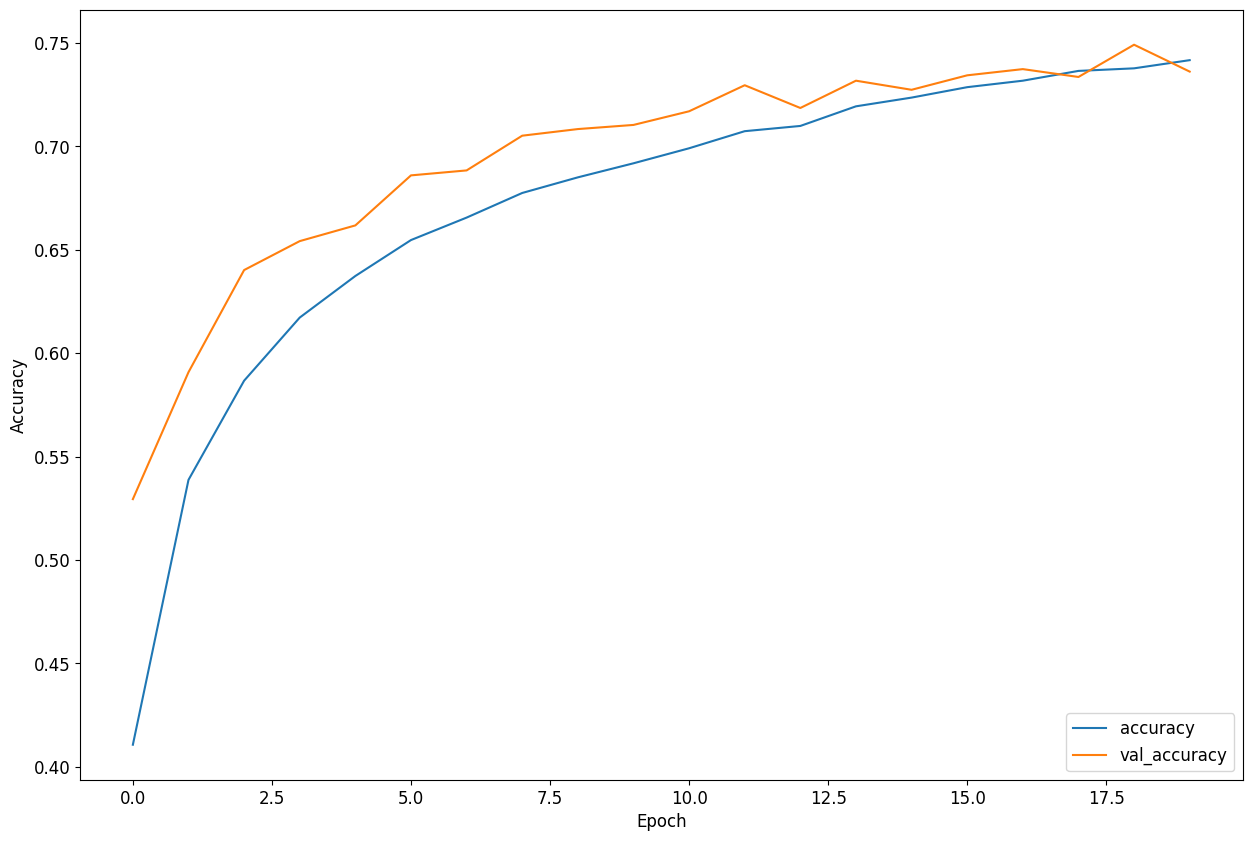

In [8]:
plt.plot(base_history.history['accuracy'], label='accuracy')
plt.plot(base_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [8]:
base_model_test_loss, base_model_test_acc = base_model.evaluate(test_images,  test_labels, verbose=2)
print("Base Model Test Accuracy:", base_model_test_acc)

313/313 - 2s - 5ms/step - accuracy: 0.7153 - loss: 0.8332
Base Model Test Accuracy: 0.7153000235557556


# Grid Search de hiperparametros

In [9]:
def create_model(activation, dropout_rate, kernel_size):
    CNN = models.Sequential(
        [
            layers.InputLayer(input_shape=(32, 32, 3)),
            layers.Conv2D(64, kernel_size=(kernel_size, kernel_size), activation=activation),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(128, kernel_size=(kernel_size, kernel_size), activation=activation),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dropout(dropout_rate),
            layers.Dense(10, activation="softmax"),
        ]
    )
    CNN.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return CNN

In [10]:
train_images.shape

(50000, 32, 32, 3)

In [11]:
model = KerasClassifier(model=create_model, epochs=20, batch_size=128)

In [12]:
param_grid = {
    "model__activation": ["relu", "sigmoid"],
    "model__dropout_rate": [.4, .6],
    "model__kernel_size": [3, 5]
}

In [13]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, verbose=4)
grid_result = grid.fit(train_images, train_labels)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.3069 - loss: 1.8987
Epoch 2/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5175 - loss: 1.3699
Epoch 3/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5673 - loss: 1.2452
Epoch 4/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5998 - loss: 1.1479
Epoch 5/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6259 - loss: 1.0777
Epoch 6/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6473 - loss: 1.0150
Epoch 7/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6622 - loss: 0.9732
Epoch 8/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6672 - loss: 0.9685
Epoch 9/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6865 - loss: 0.9111
Epoch 10/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6952 - loss: 0.8872
Epoch 11/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6996 - loss: 0.8687
Epoch 12/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/ste

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.3037 - loss: 1.9203
Epoch 2/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4983 - loss: 1.4256
Epoch 3/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5700 - loss: 1.2534
Epoch 4/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5896 - loss: 1.1775
Epoch 5/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6171 - loss: 1.1067
Epoch 6/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6379 - loss: 1.0493
Epoch 7/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6573 - loss: 0.9917
Epoch 8/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6735 - loss: 0.9463
Epoch 9/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6800 - loss: 0.9318
Epoch 10/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6937 - loss: 0.8964
Epoch 11/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6936 - loss: 0.8886
Epoch 12/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/ste

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.3059 - loss: 1.9072
Epoch 2/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5196 - loss: 1.3571
Epoch 3/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5696 - loss: 1.2270
Epoch 4/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6061 - loss: 1.1410
Epoch 5/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6322 - loss: 1.0653
Epoch 6/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6468 - loss: 1.0117
Epoch 7/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6571 - loss: 0.9817
Epoch 8/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6632 - loss: 0.9610
Epoch 9/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6879 - loss: 0.9052
Epoch 10/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6923 - loss: 0.8826
Epoch 11/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7013 - loss: 0.8676
Epoch 12/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/ste

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.2969 - loss: 1.9110
Epoch 2/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.4990 - loss: 1.4182
Epoch 3/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5545 - loss: 1.2647
Epoch 4/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5983 - loss: 1.1602
Epoch 5/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6222 - loss: 1.0794
Epoch 6/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6453 - loss: 1.0166
Epoch 7/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6668 - loss: 0.9567
Epoch 8/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6841 - loss: 0.9087
Epoch 9/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6939 - loss: 0.8792
Epoch 10/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6998 - loss: 0.8619
Epoch 11/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7111 - loss: 0.8180
Epoch 12/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/ste

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.2848 - loss: 1.9528
Epoch 2/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4876 - loss: 1.4312
Epoch 3/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5523 - loss: 1.2709
Epoch 4/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5781 - loss: 1.1917
Epoch 5/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6064 - loss: 1.1264
Epoch 6/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6271 - loss: 1.0718
Epoch 7/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6417 - loss: 1.0208
Epoch 8/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6595 - loss: 0.9800
Epoch 9/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6662 - loss: 0.9597
Epoch 10/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6895 - loss: 0.9100
Epoch 11/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6859 - loss: 0.8991
Epoch 12/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/st

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - accuracy: 0.2943 - loss: 1.9102
Epoch 2/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4958 - loss: 1.4190
Epoch 3/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5483 - loss: 1.2694
Epoch 4/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5867 - loss: 1.1879
Epoch 5/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6130 - loss: 1.1207
Epoch 6/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6482 - loss: 1.0223
Epoch 7/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6665 - loss: 0.9683
Epoch 8/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6769 - loss: 0.9327
Epoch 9/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6897 - loss: 0.8875
Epoch 10/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6978 - loss: 0.8692
Epoch 11/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7148 - loss: 0.8194
Epoch 12/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/ste

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.2694 - loss: 1.9793
Epoch 2/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4765 - loss: 1.4601
Epoch 3/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5251 - loss: 1.3300
Epoch 4/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5586 - loss: 1.2522
Epoch 5/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5865 - loss: 1.1768
Epoch 6/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6004 - loss: 1.1495
Epoch 7/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6168 - loss: 1.0958
Epoch 8/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6309 - loss: 1.0572
Epoch 9/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6411 - loss: 1.0216
Epoch 10/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6502 - loss: 0.9994
Epoch 11/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6605 - loss: 0.9715
Epoch 12/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/ste

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.2895 - loss: 1.9471
Epoch 2/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4996 - loss: 1.4245
Epoch 3/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5411 - loss: 1.2950
Epoch 4/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5854 - loss: 1.1955
Epoch 5/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6065 - loss: 1.1335
Epoch 6/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6172 - loss: 1.0940
Epoch 7/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6319 - loss: 1.0511
Epoch 8/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6490 - loss: 1.0113
Epoch 9/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6528 - loss: 1.0059
Epoch 10/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6629 - loss: 0.9729
Epoch 11/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6767 - loss: 0.9462
Epoch 12/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/ste

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.2869 - loss: 1.9461
Epoch 2/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4893 - loss: 1.4309
Epoch 3/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5397 - loss: 1.3053
Epoch 4/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5679 - loss: 1.2361
Epoch 5/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5921 - loss: 1.1601
Epoch 6/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6128 - loss: 1.1171
Epoch 7/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6225 - loss: 1.0821
Epoch 8/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6293 - loss: 1.0739
Epoch 9/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6339 - loss: 1.0486
Epoch 10/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6457 - loss: 1.0117
Epoch 11/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6571 - loss: 0.9852
Epoch 12/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/ste

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.2813 - loss: 1.9448
Epoch 2/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4654 - loss: 1.4748
Epoch 3/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5186 - loss: 1.3514
Epoch 4/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5540 - loss: 1.2595
Epoch 5/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5799 - loss: 1.1995
Epoch 6/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6027 - loss: 1.1321
Epoch 7/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6122 - loss: 1.1039
Epoch 8/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6289 - loss: 1.0519
Epoch 9/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6432 - loss: 1.0223
Epoch 10/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6597 - loss: 0.9767
Epoch 11/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6690 - loss: 0.9493
Epoch 12/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/ste

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.2696 - loss: 1.9765
Epoch 2/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4615 - loss: 1.4814
Epoch 3/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5146 - loss: 1.3525
Epoch 4/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5529 - loss: 1.2635
Epoch 5/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5768 - loss: 1.1995
Epoch 6/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6004 - loss: 1.1337
Epoch 7/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6181 - loss: 1.0790
Epoch 8/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6374 - loss: 1.0432
Epoch 9/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6497 - loss: 1.0027
Epoch 10/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6590 - loss: 0.9738
Epoch 11/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6761 - loss: 0.9350
Epoch 12/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/ste

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.2652 - loss: 1.9784
Epoch 2/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4613 - loss: 1.4817
Epoch 3/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5142 - loss: 1.3574
Epoch 4/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5617 - loss: 1.2517
Epoch 5/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5798 - loss: 1.1854
Epoch 6/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5960 - loss: 1.1471
Epoch 7/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6143 - loss: 1.0958
Epoch 8/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6329 - loss: 1.0505
Epoch 9/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6416 - loss: 1.0315
Epoch 10/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6549 - loss: 0.9799
Epoch 11/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6640 - loss: 0.9570
Epoch 12/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/ste

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.1066 - loss: 2.3964
Epoch 2/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2085 - loss: 2.1611
Epoch 3/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2882 - loss: 1.9893
Epoch 4/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3251 - loss: 1.8938
Epoch 5/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3537 - loss: 1.8217
Epoch 6/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3801 - loss: 1.7359
Epoch 7/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4068 - loss: 1.6694
Epoch 8/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4140 - loss: 1.6470
Epoch 9/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4249 - loss: 1.6133
Epoch 10/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4393 - loss: 1.5812
Epoch 11/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4426 - loss: 1.5554
Epoch 12/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/ste

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.1066 - loss: 2.3948
Epoch 2/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2239 - loss: 2.1310
Epoch 3/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2851 - loss: 1.9858
Epoch 4/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3176 - loss: 1.9014
Epoch 5/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3425 - loss: 1.8424
Epoch 6/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3699 - loss: 1.7691
Epoch 7/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3733 - loss: 1.7292
Epoch 8/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4094 - loss: 1.6687
Epoch 9/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4214 - loss: 1.6271
Epoch 10/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4285 - loss: 1.6033
Epoch 11/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4377 - loss: 1.5696
Epoch 12/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/ste

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.1025 - loss: 2.3917
Epoch 2/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1999 - loss: 2.1623
Epoch 3/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2958 - loss: 1.9756
Epoch 4/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3319 - loss: 1.8825
Epoch 5/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3601 - loss: 1.8018
Epoch 6/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3838 - loss: 1.7364
Epoch 7/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3922 - loss: 1.6976
Epoch 8/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4128 - loss: 1.6543
Epoch 9/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4208 - loss: 1.6125
Epoch 10/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4394 - loss: 1.5782
Epoch 11/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4499 - loss: 1.5428
Epoch 12/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/ste

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.1170 - loss: 2.3408
Epoch 2/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2836 - loss: 1.9842
Epoch 3/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3610 - loss: 1.7911
Epoch 4/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4126 - loss: 1.6528
Epoch 5/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4279 - loss: 1.5849
Epoch 6/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4452 - loss: 1.5359
Epoch 7/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4661 - loss: 1.4880
Epoch 8/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4785 - loss: 1.4484
Epoch 9/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4944 - loss: 1.4153
Epoch 10/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5056 - loss: 1.3790
Epoch 11/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5152 - loss: 1.3479
Epoch 12/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/ste

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.1220 - loss: 2.3345
Epoch 2/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2885 - loss: 1.9676
Epoch 3/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3645 - loss: 1.7767
Epoch 4/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4037 - loss: 1.6627
Epoch 5/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4380 - loss: 1.5749
Epoch 6/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4490 - loss: 1.5410
Epoch 7/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4612 - loss: 1.4899
Epoch 8/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4779 - loss: 1.4561
Epoch 9/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4945 - loss: 1.4193
Epoch 10/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5025 - loss: 1.3909
Epoch 11/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5139 - loss: 1.3551
Epoch 12/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/ste

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.1184 - loss: 2.3487
Epoch 2/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2771 - loss: 1.9850
Epoch 3/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3548 - loss: 1.8007
Epoch 4/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4075 - loss: 1.6427
Epoch 5/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4301 - loss: 1.5756
Epoch 6/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4466 - loss: 1.5261
Epoch 7/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4628 - loss: 1.4924
Epoch 8/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4770 - loss: 1.4527
Epoch 9/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4926 - loss: 1.4242
Epoch 10/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5025 - loss: 1.3950
Epoch 11/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5096 - loss: 1.3566
Epoch 12/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/ste

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.1048 - loss: 2.4138
Epoch 2/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1776 - loss: 2.2167
Epoch 3/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2655 - loss: 2.0334
Epoch 4/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3134 - loss: 1.9379
Epoch 5/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3305 - loss: 1.8804
Epoch 6/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3506 - loss: 1.8170
Epoch 7/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3723 - loss: 1.7631
Epoch 8/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3806 - loss: 1.7274
Epoch 9/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3990 - loss: 1.6836
Epoch 10/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4102 - loss: 1.6621
Epoch 11/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4195 - loss: 1.6270
Epoch 12/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/ste

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.1028 - loss: 2.3799
Epoch 2/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1782 - loss: 2.2113
Epoch 3/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2681 - loss: 2.0313
Epoch 4/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3046 - loss: 1.9354
Epoch 5/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3318 - loss: 1.8677
Epoch 6/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3622 - loss: 1.7966
Epoch 7/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3740 - loss: 1.7599
Epoch 8/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3897 - loss: 1.7070
Epoch 9/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3992 - loss: 1.6883
Epoch 10/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4025 - loss: 1.6648
Epoch 11/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4167 - loss: 1.6461
Epoch 12/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/ste

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.1023 - loss: 2.3827
Epoch 2/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1700 - loss: 2.2283
Epoch 3/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2593 - loss: 2.0510
Epoch 4/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3062 - loss: 1.9513
Epoch 5/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3317 - loss: 1.8828
Epoch 6/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3581 - loss: 1.7999
Epoch 7/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3863 - loss: 1.7362
Epoch 8/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3981 - loss: 1.6904
Epoch 9/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4100 - loss: 1.6498
Epoch 10/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4192 - loss: 1.6305
Epoch 11/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4248 - loss: 1.6099
Epoch 12/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/ste

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.1044 - loss: 2.3614
Epoch 2/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.1445 - loss: 2.2478
Epoch 3/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2593 - loss: 2.0130
Epoch 4/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3336 - loss: 1.8453
Epoch 5/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3716 - loss: 1.7456
Epoch 6/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3978 - loss: 1.6720
Epoch 7/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.4233 - loss: 1.6032
Epoch 8/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4382 - loss: 1.5566
Epoch 9/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4543 - loss: 1.5250
Epoch 10/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4664 - loss: 1.5000
Epoch 11/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4702 - loss: 1.4744
Epoch 12/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/ste

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.1007 - loss: 2.3434
Epoch 2/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2162 - loss: 2.1138
Epoch 3/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2752 - loss: 1.9833
Epoch 4/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3373 - loss: 1.8418
Epoch 5/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.3833 - loss: 1.7203
Epoch 6/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4175 - loss: 1.6270
Epoch 7/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4351 - loss: 1.5792
Epoch 8/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4481 - loss: 1.5401
Epoch 9/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4512 - loss: 1.5218
Epoch 10/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4670 - loss: 1.4830
Epoch 11/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4816 - loss: 1.4584
Epoch 12/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/ste

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.1027 - loss: 2.3584
Epoch 2/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.2499 - loss: 2.0455
Epoch 3/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3150 - loss: 1.9008
Epoch 4/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.3669 - loss: 1.7672
Epoch 5/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4076 - loss: 1.6460
Epoch 6/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4234 - loss: 1.5949
Epoch 7/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4405 - loss: 1.5609
Epoch 8/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.4559 - loss: 1.5113
Epoch 9/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4640 - loss: 1.4921
Epoch 10/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4758 - loss: 1.4632
Epoch 11/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4846 - loss: 1.4359
Epoch 12/20
261/261 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/ste

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.3402 - loss: 1.8167
Epoch 2/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - accuracy: 0.5475 - loss: 1.2999
Epoch 3/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6034 - loss: 1.1472
Epoch 4/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6318 - loss: 1.0727
Epoch 5/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6520 - loss: 1.0054
Epoch 6/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6714 - loss: 0.9582
Epoch 7/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.6852 - loss: 0.9194
Epoch 8/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.6982 - loss: 0.8818
Epoch 9/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.7074 - loss: 0.8523
Epoch 10/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7148 - loss: 0.8374
Epoch 11/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.7192 - loss: 0.8077
Epoch 12/20
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/ste

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f +/- %f with: %r" % (mean, stdev, param))

In [ ]:
gs_model_test_loss, gs_model_test_acc = grid.best_estimator_.model_.evaluate(test_images, test_labels)
print("Base Model Test Accuracy:", gs_model_test_acc)

In [ ]:
layers.RandomFlip("horizontal")(train_images[i]).shape

In [ ]:
plt.figure(figsize=(10, 10), dpi=100)
for i in range(5):
    plt.subplot(4, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
    if i == 0:
        plt.ylabel("Original")

for i in range(5):
    plt.subplot(4, 5, 5 + i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(layers.RandomCrop(28, 28)(train_images[i], training=True), cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
    if i == 0:
        plt.ylabel("Random Crop")

for i in range(5):
    plt.subplot(4, 5, 10 + i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(layers.RandomFlip("horizontal")(train_images[i], training=True), cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
    if i == 0:
        plt.ylabel("Random Horizontal Flip")

for i in range(5):
    plt.subplot(4, 5, 15 + i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(layers.RandomRotation(.1)(train_images[i], training=True), cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
    if i == 0:
        plt.ylabel("Random Rotation")

plt.ylabel
plt.show()

In [ ]:
da_model = models.Sequential(
        [
            layers.InputLayer(input_shape=(32, 32, 3)),
            layers.RandomFlip("horizontal"),
            layers.RandomRotation(0.1),
            layers.RandomCrop(30, 30),
            layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dropout(0.5),
            layers.Dense(10, activation="softmax"),
        ]
    )
da_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
da_history = da_model.fit(train_images, train_labels, batch_size=128, epochs=20, validation_split=0.1)

In [ ]:
plt.plot(da_history.history['accuracy'], label='accuracy')
plt.plot(da_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

In [ ]:
da_model_test_loss, da_model_test_acc = da_model.evaluate(test_images,  test_labels, verbose=2)
print("Base Model Test Accuracy:", da_model_test_acc)

# Data Augmentation y Grid Search

In [ ]:
def create_da_model(activation, dropout_rate, kernel_size):
    CNN = models.Sequential(
        [
            layers.InputLayer(input_shape=(32, 32, 3)),
            layers.RandomFlip("horizontal"),
            layers.RandomRotation(0.1),
            layers.RandomCrop(30, 30),
            layers.Conv2D(64, kernel_size=(kernel_size, kernel_size), activation=activation),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(128, kernel_size=(kernel_size, kernel_size), activation=activation),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Flatten(),
            layers.Dropout(dropout_rate),
            layers.Dense(10, activation="softmax"),
        ]
    )
    CNN.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return CNN

In [ ]:
da_model_wrapper = KerasClassifier(model=create_da_model, epochs=20, batch_size=128)

In [ ]:
da_grid = GridSearchCV(estimator=da_model_wrapper, param_grid=param_grid, cv=3, verbose=4)
da_grid_result = da_grid.fit(train_images, train_labels)

In [ ]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f +/- %f with: %r" % (mean, stdev, param))

In [ ]:
gs_model_test_loss, gs_model_test_acc = grid.best_estimator_.model_.evaluate(test_images, test_labels)
print("Base Model Test Accuracy:", gs_model_test_acc)

### Referencias
* How to Grid Search Hyperparameters for Deep Learning Models in Python with Keras. https://machinelearningmastery.com/grid-search-hyperparameters-deep-learning-models-python-keras/